In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
dataset=pd.read_csv('bank-full.csv',sep=';')

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data=dataset.copy()

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data=data.join(pd.get_dummies(data['job'],prefix='Job_'))
data=data.join(pd.get_dummies(data['marital'],prefix='Marital_'))
data=data.join(pd.get_dummies(data['education'],prefix='Education_'))
data=data.join(pd.get_dummies(data['default'],prefix='Defult_'))
data=data.join(pd.get_dummies(data['loan'],prefix='Loan_'))
data=data.join(pd.get_dummies(data['housing'],prefix='housing'))
data=data.join(pd.get_dummies(data['contact'],prefix='Contact_'))
data=data.join(pd.get_dummies(data['month'],prefix='Month_'))
data=data.join(pd.get_dummies(data['poutcome'],prefix='Poutcome_'))
data=data.join(pd.get_dummies(data['y'],prefix='Y_'))
data.drop(['job','housing','marital','education','default','loan','contact','month','poutcome','y'],axis=1,inplace=True)
data.head()

,age,balance,day,duration,campaign,pdays,previous,Job__admin.,Job__blue-collar,Job__entrepreneur,...,Month__may,Month__nov,Month__oct,Month__sep,Poutcome__failure,Poutcome__other,Poutcome__success,Poutcome__unknown,Y__no,Y__yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,Job__admin.,Job__blue-collar,Job__entrepreneur,...,Month__may,Month__nov,Month__oct,Month__sep,Poutcome__failure,Poutcome__other,Poutcome__success,Poutcome__unknown,Y__no,Y__yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.114375,0.215257,0.032890,...,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478,0.883015,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.318269,0.411005,0.178351,...,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278,0.321406,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler
Scalers=StandardScaler()
data['age']=Scalers.fit_transform(data['age'].values.reshape(-1,1))
data['balance']=Scalers.fit_transform(data['balance'].values.reshape(-1,1))
data['day']=Scalers.fit_transform(data['day'].values.reshape(-1,1))
data['duration']=Scalers.fit_transform(data['duration'].values.reshape(-1,1))
data['campaign']=Scalers.fit_transform(data['campaign'].values.reshape(-1,1))
data['pdays']=Scalers.fit_transform(data['pdays'].values.reshape(-1,1))
data['previous']=Scalers.fit_transform(data['previous'].values.reshape(-1,1))
data.head()

,age,balance,day,duration,campaign,pdays,previous,Job__admin.,Job__blue-collar,Job__entrepreneur,...,Month__may,Month__nov,Month__oct,Month__sep,Poutcome__failure,Poutcome__other,Poutcome__success,Poutcome__unknown,Y__no,Y__yes
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0


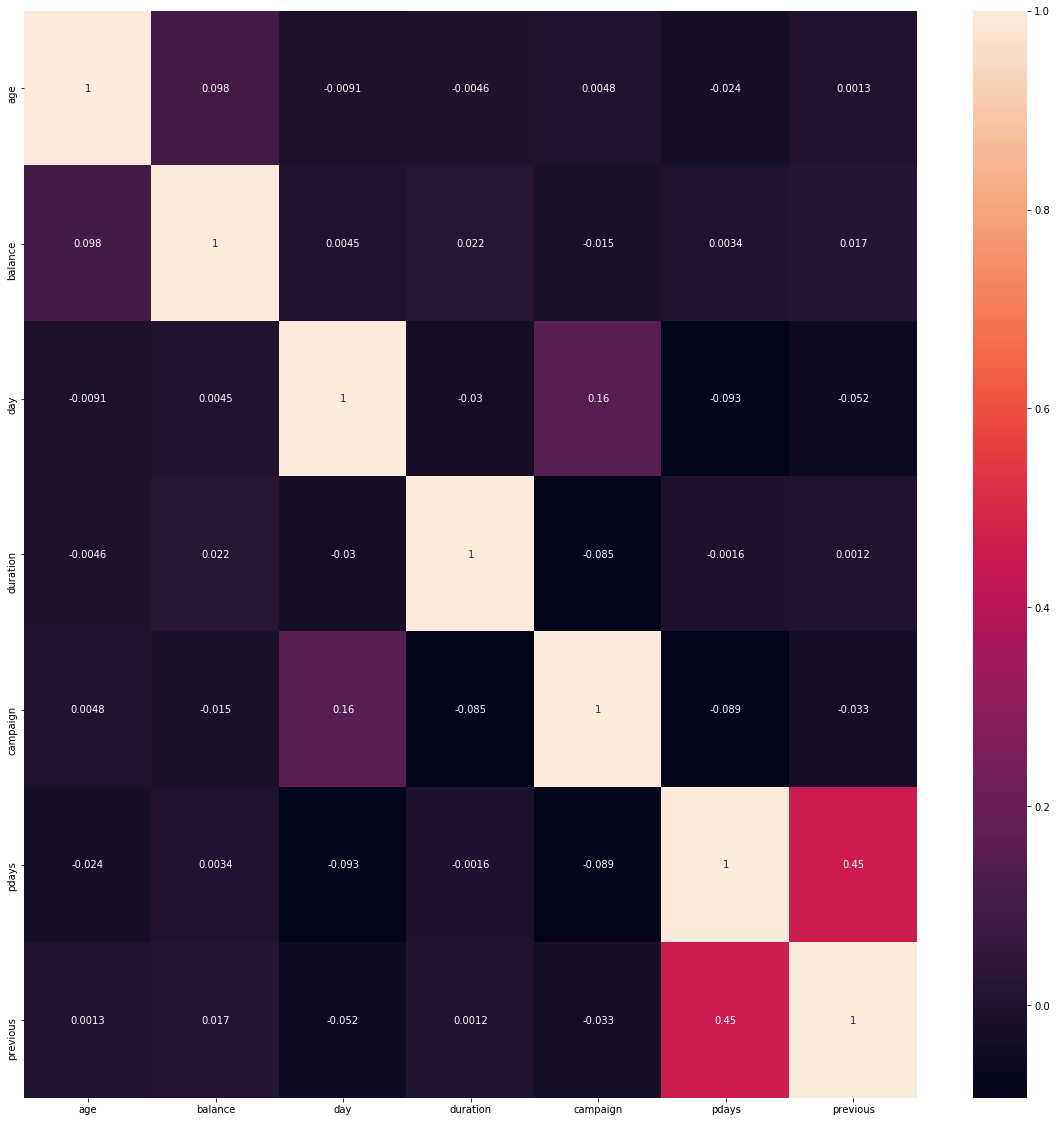

In [10]:
fig =plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True)

In [20]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=262)

In [21]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc=dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [22]:
print('Accuarcy : ',metrics.accuracy_score(y_test,y_pred))

Accuarcy :  1.0


In [23]:
metrics.confusion_matrix(y_test,y_pred)

array([[11991,     0],
       [    0,  1573]], dtype=int64)

In [24]:
metrics.f1_score(y_test,y_pred)

1.0

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=5)
rfc=rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [26]:
metrics.accuracy_score(y_test,y_pred)

0.9997788263049248

In [27]:
metrics.confusion_matrix(y_pred,y_test)

array([[11990,     2],
       [    1,  1571]], dtype=int64)

In [29]:
metrics.f1_score(y_pred,y_test)

0.9990461049284579

In [39]:
paramters_grid = {'max_depth':np.arange(3, 13),'max_features':np.arange(3,len(x.columns))}

In [41]:
dtc2=GridSearchCV(DecisionTreeClassifier(), paramters_grid)
dtc2=dtc2.fit(x_train,y_train)
y_pred=dtc2.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

C:\Users\aya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


1.0

In [42]:
dtc2.best_params_

{'max_depth': 3, 'max_features': 24}